In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ann-car-sales-price-prediction/car_purchasing.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../input/ann-car-sales-price-prediction/car_purchasing.csv',encoding='latin')

In [4]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [6]:
df.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [7]:
df = df.drop(columns=['customer name','customer e-mail','country','gender'],axis=1)

In [8]:
df.head()

,age,annual Salary,credit card debt,net worth,car purchase amount
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


<Axes: >

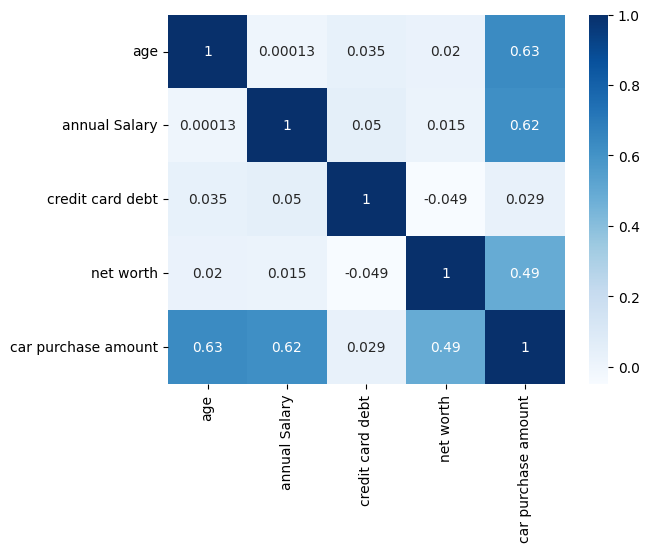

In [9]:
sns.heatmap(df.corr(),cmap='Blues',annot=True)

<Axes: xlabel='car purchase amount', ylabel='net worth'>

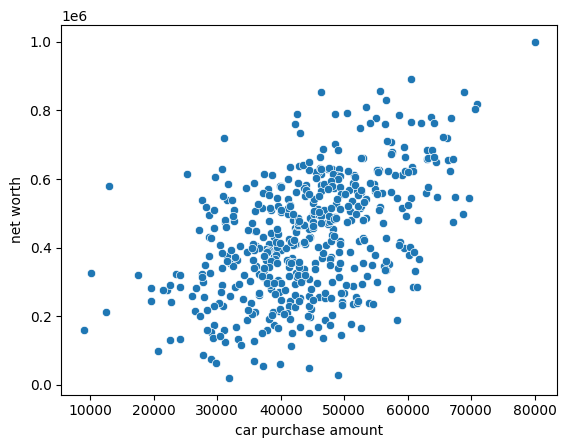

In [10]:
sns.scatterplot(data=df,y='net worth',x='car purchase amount')

<Axes: xlabel='car purchase amount', ylabel='credit card debt'>

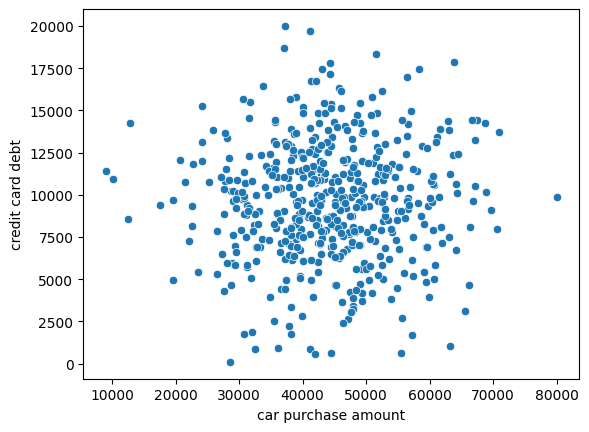

In [11]:
sns.scatterplot(data=df,y='credit card debt',x='car purchase amount')

<Axes: xlabel='car purchase amount', ylabel='annual Salary'>

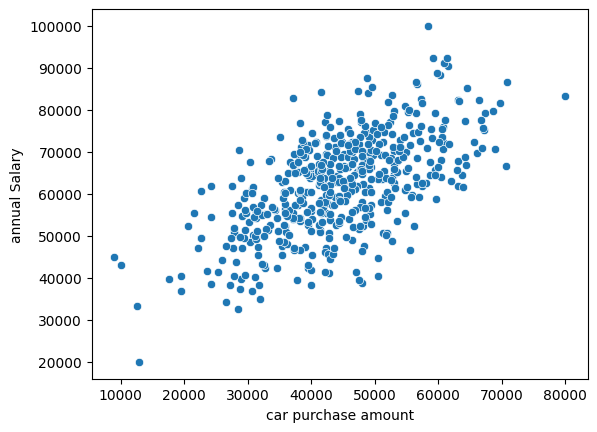

In [12]:
sns.scatterplot(data=df,y='annual Salary',x='car purchase amount')

In [13]:
df.head()

,age,annual Salary,credit card debt,net worth,car purchase amount
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [14]:
X = df.drop('car purchase amount',axis=1)
y = df['car purchase amount']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
target_reshaped = y.values.reshape(-1, 1)
scaled_target = scaler.fit_transform(target_reshaped)

In [17]:
X_train,X_test,y_train,y_test = train_test_split(scaled_features,scaled_target,test_size=0.3,random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()

In [20]:
model.fit(X_train,y_train)

LinearRegression()

In [21]:
test_predictions = model.predict(X_test)

In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [23]:
from sklearn.metrics import r2_score

In [24]:
df['car purchase amount'].mean()

44209.79921842

In [25]:
mean_absolute_error(y_test,test_predictions)

0.00010451195913286267

In [26]:
MSE = mean_squared_error(y_test,test_predictions)

In [27]:
RMSE = np.sqrt(MSE)

In [28]:
RMSE

0.00013263074462019358

In [29]:
y_pred_original = scaler.inverse_transform(test_predictions)

In [30]:
r2 = r2_score(scaler.inverse_transform(y_test), y_pred_original)
print("R2 Score:", r2)

R2 Score: 0.9999999809047293
